In [1]:
import requests
import pandas as pd

In [2]:
# Build base URL
HOST = "https://api.census.gov/data"
year = "2010"
dataset = "dec/sf1"
base_url = "/".join([HOST, year, dataset])

# Specify Census variables and other predicates
get_vars = ["NAME", "P013001", "P037001"]
predicates = {}
predicates["get"] = ",".join(get_vars)
predicates["for"] = "state:*"

# Execute the request, examine text of response object
r = requests.get(base_url, params=predicates)
print(r.text)

[["NAME","P013001","P037001","state"],
["Alabama","37.9","3.02","01"],
["Alaska","33.8","3.21","02"],
["Arizona","35.9","3.19","04"],
["Arkansas","37.4","3.00","05"],
["California","35.2","3.45","06"],
["Louisiana","35.8","3.10","22"],
["Kentucky","38.1","2.98","21"],
["Colorado","36.1","3.08","08"],
["Connecticut","40.0","3.08","09"],
["Delaware","38.8","3.06","10"],
["District of Columbia","33.8","3.01","11"],
["Florida","40.7","3.01","12"],
["Georgia","35.3","3.17","13"],
["Hawaii","38.6","3.42","15"],
["Idaho","34.6","3.16","16"],
["Illinois","36.6","3.20","17"],
["Indiana","37.0","3.05","18"],
["Iowa","38.1","2.97","19"],
["Kansas","36.0","3.06","20"],
["Maine","42.7","2.83","23"],
["Maryland","38.0","3.15","24"],
["Massachusetts","39.1","3.08","25"],
["Michigan","38.9","3.05","26"],
["Minnesota","37.4","3.05","27"],
["Mississippi","36.0","3.11","28"],
["Missouri","37.9","3.00","29"],
["Montana","39.8","2.91","30"],
["Nebraska","36.2","3.04","31"],
["Nevada","36.3","3.20","32"],
[

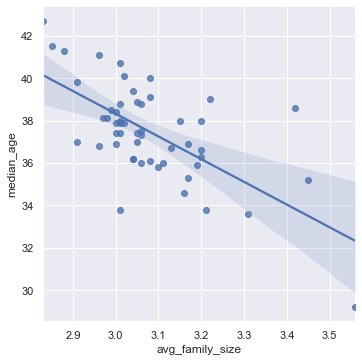

In [4]:
# Import seaborn
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# Construct the data frame
col_names = ["name", "median_age", "avg_family_size", "state"]
states = pd.DataFrame(columns = col_names, data = r.json()[1:])

# Convert each column with numeric data to an appropriate type
states["median_age"] = states["median_age"].astype(float)
states["avg_family_size"] = states["avg_family_size"].astype(float)

# Scatterplot with regression line
sns.lmplot(x = "avg_family_size", y = "median_age", data = states)
plt.show()

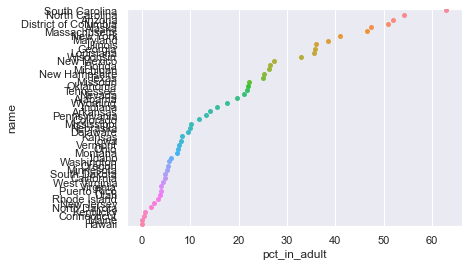

In [5]:
# Specify variables and execute API request
get_vars = ["NAME", "PCT021005", "PCT021015"]
predicates["get"] = ",".join(get_vars)
r = requests.get(base_url, params=predicates)

# Construct data frame
col_names = ["name", "in_adult", "in_juvenile", "state"]
states = pd.DataFrame(columns=col_names, data=r.json()[1:])
states[["in_adult", "in_juvenile"]] = states[["in_adult", "in_juvenile"]].astype(int)

# Calculate percentage of incarcerated male minors in adult facilities
states["pct_in_adult"] = 100 * states["in_adult"] / (states["in_adult"] + states["in_juvenile"])
states.sort_values(by = "pct_in_adult", ascending = False, inplace = True)
sns.stripplot(x = "pct_in_adult", y = "name", data = states)
plt.show()

In [6]:
# Build dictionary of predicates
get_vars = ["NAME", "P001001"] # <- total population
predicates = {}
predicates["get"] = ",".join(get_vars)
predicates["for"] = "place:60000,61000"
predicates["in"] = "state:42"

# Execute the request
r = requests.get(base_url, params=predicates)

# Show the response text
print(r.text)

[["NAME","P001001","state","place"],
["Philadelphia city, Pennsylvania","1526006","42","60000"],
["Pittsburgh city, Pennsylvania","305704","42","61000"]]


In [7]:
# Build dictionary of predicates and execute the request
predicates["for"] = "congressional district:*"
predicates["in"] = "state:42"
r = requests.get(base_url, params=predicates)

# Construct the data frame
col_names = ["name", "avg_family_size", "state", "cd"]
cd = pd.DataFrame(columns=col_names, data=r.json()[1:])

In [8]:
# Build dictionary of predicates and execute the request
predicates["for"] = "congressional district:*"
predicates["in"] = "state:42"
r = requests.get(base_url, params=predicates)

# Construct the data frame
col_names = ["name", "avg_family_size", "state", "cd"]
cd = pd.DataFrame(columns=col_names, data=r.json()[1:])

# Print the head of the "avg_family_size" column
print(cd["avg_family_size"].head())

0    655146
1    630277
2    640356
3    647418
4    651762
Name: avg_family_size, dtype: object


In [9]:
# Build dictionary of predicates and execute the request
predicates["for"] = "congressional district:*"
predicates["in"] = "state:42"
r = requests.get(base_url, params=predicates)

# Construct the data frame
col_names = ["name", "avg_family_size", "state", "cd"]
cd = pd.DataFrame(columns=col_names, data=r.json()[1:])

# Print the head of the "avg_family_size" column
print(cd["avg_family_size"].head())

# Set data type and print
cd["avg_family_size"] = cd["avg_family_size"].astype(float)
print(cd)

0    655146
1    630277
2    640356
3    647418
4    651762
Name: avg_family_size, dtype: object
                                                 name  avg_family_size state  \
0   Congressional District 1 (111th Congress), Pen...         655146.0    42   
1   Congressional District 2 (111th Congress), Pen...         630277.0    42   
2   Congressional District 3 (111th Congress), Pen...         640356.0    42   
3   Congressional District 4 (111th Congress), Pen...         647418.0    42   
4   Congressional District 5 (111th Congress), Pen...         651762.0    42   
5   Congressional District 8 (111th Congress), Pen...         672685.0    42   
6   Congressional District 6 (111th Congress), Pen...         726465.0    42   
7   Congressional District 7 (111th Congress), Pen...         673623.0    42   
8   Congressional District 11 (111th Congress), Pe...         687860.0    42   
9   Congressional District 9 (111th Congress), Pen...         666810.0    42   
10  Congressional Distr